# Clustering sobre Historial de Tanques

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import datetime

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

/home/mferreyra/.virtualenvs/diplodatos-ans/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
sns.set_style('whitegrid')
sns.set_context('talk')

In [3]:
PATH_HIST_TANQUES = '../../Datasets/sis_historial_2018_8.csv'

df = pd.read_csv(PATH_HIST_TANQUES, index_col=['id'], parse_dates=[['fecha', 'hora']])

In [4]:
df.head(10)

,fecha_hora,id_equipo,id_tanque,volumen,temperatura,codigo,baja,vbat1,vbat2,fuel_level_dmm,water_level_dmm,water_volume_lts,tank_site_id
id,,,,,,,,,,,,,
33,2018-08-06 15:22:05,385,875,222.840,15.1,N1,0,60,291,778,0,0.0,1
3060,2018-08-08 17:50:42,439,1095,32942.052,13.5,N1,0,60,308,19854,0,0.0,1
3061,2018-08-08 17:50:42,439,1095,32942.052,13.5,V1,0,60,308,19854,0,0.0,1
14668,2018-08-08 17:51:26,452,1044,5276.250,17.6,V1,0,61,295,4925,0,0.0,1
17515,2018-08-08 18:02:14,365,770,52424.925,5.0,N1,0,67,364,4575,0,0.0,2
17516,2018-08-08 18:02:33,365,771,91199.780,4.0,N1,0,66,362,7795,0,0.0,3
25188,2018-08-08 21:02:27,480,1022,21480.200,16.4,N1,0,60,300,14586,0,6.0,1
24170,2018-08-09 00:01:48,482,1026,21420.456,11.9,N1,0,60,302,11272,0,0.0,1
25870,2018-08-08 23:45:58,227,566,14040.832,10.3,N1,0,60,281,9492,0,0.0,1


In [5]:
df.shape

(10000, 13)

In [6]:
df.dtypes

fecha_hora          datetime64[ns]
id_equipo                    int64
id_tanque                    int64
volumen                    float64
temperatura                float64
codigo                      object
baja                         int64
vbat1                        int64
vbat2                        int64
fuel_level_dmm               int64
water_level_dmm              int64
water_volume_lts           float64
tank_site_id                 int64
dtype: object

In [7]:
df.describe(include='all')

,fecha_hora,id_equipo,id_tanque,volumen,temperatura,codigo,baja,vbat1,vbat2,fuel_level_dmm,water_level_dmm,water_volume_lts,tank_site_id
count,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
unique,8449,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2018-08-09 10:00:00,NaN,NaN,NaN,NaN,V1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,NaN,NaN,NaN,NaN,5710,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2018-08-06 15:22:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2018-08-09 18:55:04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,349.972600,721.748100,19175.575612,12.238010,NaN,0.0,61.004300,295.674900,11985.527800,0.022200,0.246106,2.476000
std,NaN,119.074092,311.167135,18999.950478,4.485121,NaN,0.0,4.897722,32.558501,6286.145551,0.593079,1.184894,1.784921
min,NaN,6.000000,96.000000,0.000000,0.000000,NaN,0.0,25.000000,202.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,248.000000,422.000000,7175.324750,8.900000,NaN,0.0,60.000000,285.000000,7710.500000,0.000000,0.000000,1.000000


In [8]:
df.dropna().shape

(10000, 13)

In [9]:
min_datetime = df.fecha_hora.min()
max_datetime = df.fecha_hora.max()

print("Min Datetime =", min_datetime)
print("Max Datetime =", max_datetime)
print()
print("Max - Min Datetime =", max_datetime - min_datetime)


Min Datetime = 2018-08-06 15:22:05
Max Datetime = 2018-08-09 18:55:04

Max - Min Datetime = 3 days 03:32:59


In [10]:
def normalize_datetime(x):
    return (x - min_datetime) / (max_datetime - min_datetime)

In [11]:
# Create a label (category) encoder object
le = LabelEncoder()
# Fit the encoder to the pandas column
le.fit(df['codigo'])

# View encoder mapping
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'F1': 0, 'L0': 1, 'L1': 2, 'M1': 3, 'N0': 4, 'N1': 5, 'N2': 6, 'T1': 7, 'V1': 8}


In [12]:
# Encondeamos la columna 'codigo'
df['codigo'] = le.transform(df['codigo'])

# Normalizamos la columna 'fecha_hora'
df['fecha_hora'] = df['fecha_hora'].apply(normalize_datetime)

# Dropeamos la columna 'baja'
df = df.drop('baja', axis=1)

In [13]:
df.head(10)

,fecha_hora,id_equipo,id_tanque,volumen,temperatura,codigo,vbat1,vbat2,fuel_level_dmm,water_level_dmm,water_volume_lts,tank_site_id
id,,,,,,,,,,,,
33,0.000000,385,875,222.840,15.1,5,60,291,778,0,0.0,1
3060,0.668129,439,1095,32942.052,13.5,5,60,308,19854,0,0.0,1
3061,0.668129,439,1095,32942.052,13.5,8,60,308,19854,0,0.0,1
14668,0.668291,452,1044,5276.250,17.6,8,61,295,4925,0,0.0,1
17515,0.670673,365,770,52424.925,5.0,5,67,364,4575,0,0.0,2
17516,0.670743,365,771,91199.780,4.0,5,66,362,7795,0,0.0,3
25188,0.710430,480,1022,21480.200,16.4,5,60,300,14586,0,6.0,1
24170,0.749995,482,1026,21420.456,11.9,5,60,302,11272,0,0.0,1
25870,0.746502,227,566,14040.832,10.3,5,60,281,9492,0,0.0,1


In [14]:
df = df.drop(['fecha_hora', 'id_tanque', 'codigo', 'fuel_level_dmm', 'water_level_dmm', 'water_volume_lts', 'tank_site_id', 'vbat1', 'vbat2'], axis=1)

In [15]:
df.head(10)

,id_equipo,volumen,temperatura
id,,,
33,385,222.840,15.1
3060,439,32942.052,13.5
3061,439,32942.052,13.5
14668,452,5276.250,17.6
17515,365,52424.925,5.0
17516,365,91199.780,4.0
25188,480,21480.200,16.4
24170,482,21420.456,11.9
25870,227,14040.832,10.3


In [16]:
# https://datascience.stackexchange.com/questions/16700/confused-about-how-to-apply-kmeans-on-my-a-dataset-with-features-extracted

#Make a copy of DF
df_tr = df

In [17]:
df_array = df.values

In [18]:
df_array[:5]

array([[3.8500000e+02, 2.2284000e+02, 1.5100000e+01],
       [4.3900000e+02, 3.2942052e+04, 1.3500000e+01],
       [4.3900000e+02, 3.2942052e+04, 1.3500000e+01],
       [4.5200000e+02, 5.2762500e+03, 1.7600000e+01],
       [3.6500000e+02, 5.2424925e+04, 5.0000000e+00]])

In [19]:
n_clusters = 3

km = KMeans(n_clusters=n_clusters)

In [20]:
km.fit(df)
#km.fit(df_array)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [21]:
clusters = km.labels_.tolist()

print(len(clusters))
print(clusters[:100])

# Recuento del número de elementos en cada cluster
for i in range(n_clusters):
    print('El cluster {} tiene {} elementos'.format(i, clusters.count(i)))

10000
[0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
El cluster 0 tiene 7819 elementos
El cluster 1 tiene 1809 elementos
El cluster 2 tiene 372 elementos


In [22]:
#Glue back to originaal data
df_tr['clusters'] = clusters

#Add the column into our list
#clmns.extend(['clusters'])

display(df_tr.head(10))
df_tr_gb = df_tr.groupby('clusters')

#Lets analyze the clusters
#print df_tr[clmns].groupby(['clusters']).mean()

,id_equipo,volumen,temperatura,clusters
id,,,,
33,385,222.840,15.1,0
3060,439,32942.052,13.5,1
3061,439,32942.052,13.5,1
14668,452,5276.250,17.6,0
17515,365,52424.925,5.0,1
17516,365,91199.780,4.0,2
25188,480,21480.200,16.4,0
24170,482,21420.456,11.9,0
25870,227,14040.832,10.3,0


In [23]:
gb = df_tr_gb.groups

#for key, values in gb.items():
#    print(df.loc[values])

Text(52.7298,0.5,'Temperatura')

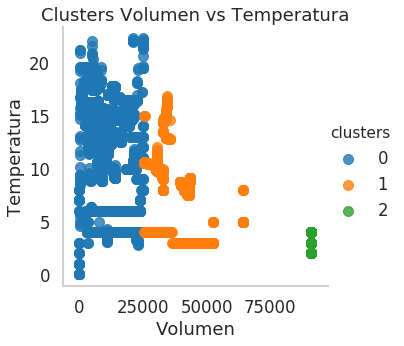

In [24]:
#Scatter plot of id_equipo and id_tanque

sns.lmplot(x='volumen', y='temperatura', data=df_tr, fit_reg=False, hue="clusters", scatter_kws={"marker": "D", "s": 100})
plt.grid()
plt.title('Clusters Volumen vs Temperatura')
plt.xlabel('Volumen')
plt.ylabel('Temperatura')

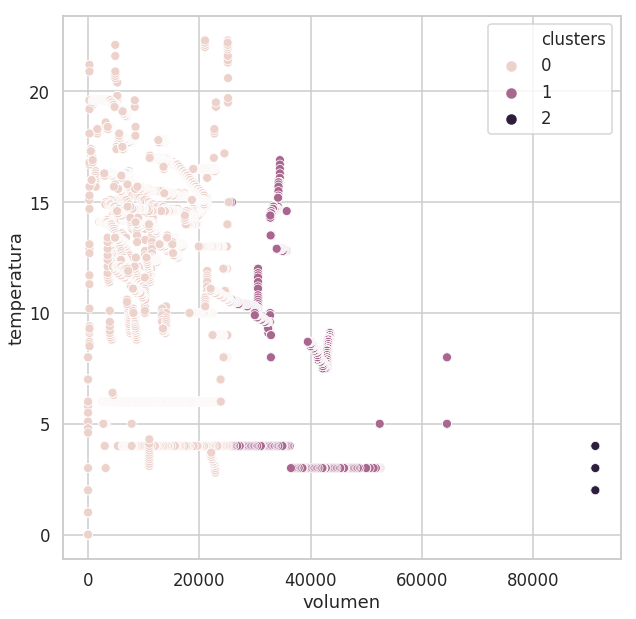

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

ax2 = sns.scatterplot(x='volumen', y='temperatura', hue='clusters', data=df_tr, ax=ax)

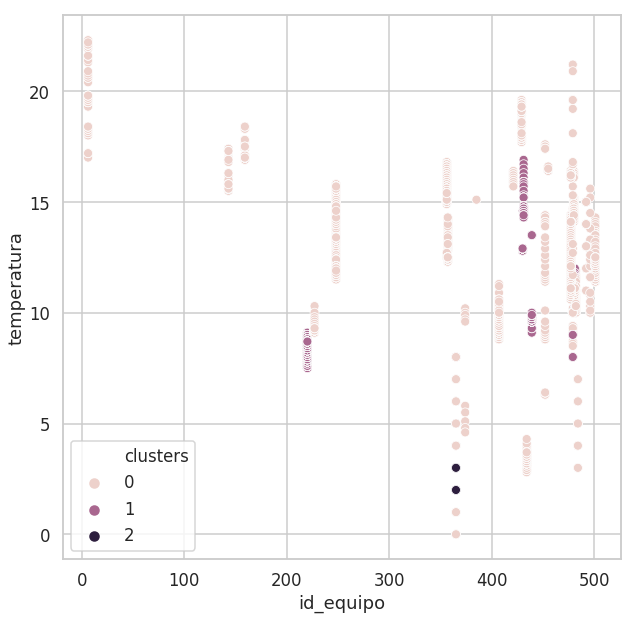

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

ax2 = sns.scatterplot(x='id_equipo', y='temperatura', hue='clusters', data=df_tr, ax=ax)

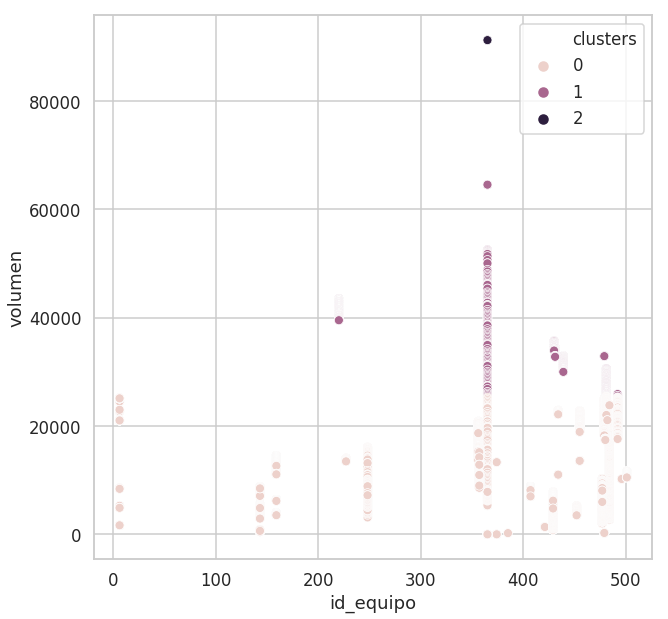

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

ax2 = sns.scatterplot(x='id_equipo', y='volumen', hue='clusters', data=df_tr, ax=ax)